O que é a Learning Curve?
- É uma visualização que demonstra como o desempenho do modelo varia com o tamanho do conjunto de treinamento.
- Útil para entender se o modelo está sofrendo de underfitting ou overfitting.
- Ajuda a avaliar a necessidade de mais dados ou maior complexidade no modelo.

Gerando dados sintéticos para o exemplo:



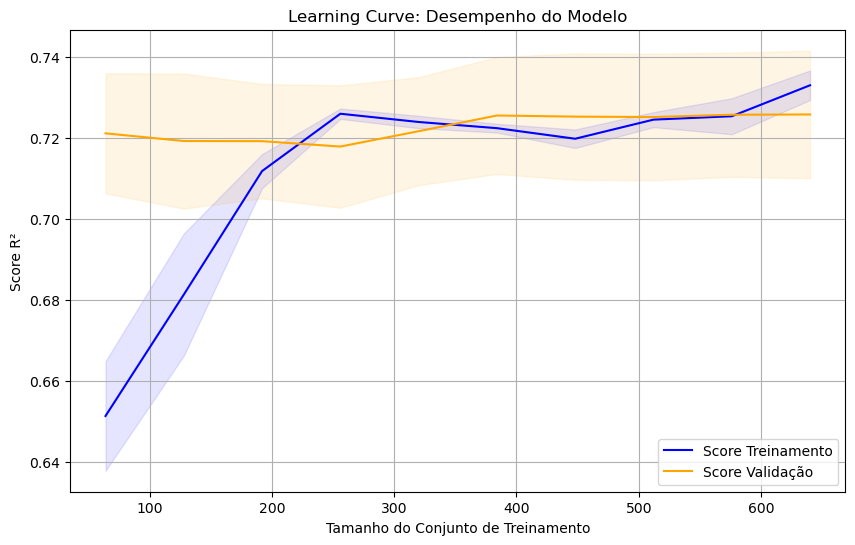

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Explicação inicial
print("O que é a Learning Curve?")
print("- É uma visualização que demonstra como o desempenho do modelo varia com o tamanho do conjunto de treinamento.")
print("- Útil para entender se o modelo está sofrendo de underfitting ou overfitting.")
print("- Ajuda a avaliar a necessidade de mais dados ou maior complexidade no modelo.\n")

# Gerando um conjunto de dados sintético
print("Gerando dados sintéticos para o exemplo:\n")
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo para o aprendizado
model = LinearRegression()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring="r2"
)

# Calculando médias e desvios padrão
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Visualização
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Score Treinamento", color="blue")
plt.plot(train_sizes, test_mean, label="Score Validação", color="orange")

# Adicionando as regiões de erro
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.1)

# Customizando o gráfico
plt.title("Learning Curve: Desempenho do Modelo")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score R²")
plt.legend()
plt.grid(True)
plt.show()
